En cas de probl√®me particulier (lors de l'execution d'une cellule), on pourra relancer le noyau jupyter.

Vos r√©ponses (codes ou r√©ponses) doivent √™tre plac√©es entre les balises :`VOTRE CODE ICI` ou "VOTRE REPONSE ICI", N'oubliez pas d'indiquer vos noms et pr√©noms

In [ ]:
NOMS et PRENOMS = "Timoth√© Picot & Cadoret Duncan"


---

# <p style="text-align: center;"> Projet 1 mod√©lisation  <br> Courbes et sous courbes de B√©zier, courbes de B√©zier rationnelles
</p>

## <span style="color:red">  **Consignes g√©n√©rales :** </span>
1. Lire attentivement le sujet
2. les structures de donn√©es ainsi que  les entr√©es et sorties des m√©thodes demand√©es (et leur type) sont **impos√©es**. Il ne faut pas les modifier
3. Pour qu'une cellule de code soit prise en compte elle doit √™tre execut√©e.
4. Ne **pas ajouter ou effacer de cellule**. Si, n√©anmoins, vous ajoutez  une cellule pour des tests, il faudra la supprimer avant de d√©poser votre notebook. Il est cependant pr√©f√©rable de faire vos test sur un autre notebook (ou ide, etc).
5. Si vous faites une modification dans une cellule, il faut "l'executer" pour qu'elle soit prise en compte.
6. Des tests de validation de certaines m√©thodes sont propos√©s, il est n√©cessaire de les passer mais pas suffisant !
7. Vous pouvez utiliser, en les adaptant,  les  m√©thodes obtenues durant les s√©ances de tp.
8. Dans la cellule ci-dessous, vous pouvez ajouter les fonctions des tp pr√©c√©dents et dont vous avez besoin (**Bernstein**, etc).
9. Enfin lors du d√©pot sur moodle, **ne pas modifier le nom du fichier.**

### <ins> Avec les polyn√¥mes de Bernstein </ins>

Pour $n+1$ points de contr√¥le $(\mathbf{P}_0, \dots, \mathbf{P}_n)$, on d√©finit la courbe de B√©zier   
$$\sum_{i=0}^n B_i^n(t)\mathbf{P}_i, \quad t \in[0,1] $$ 
o√π les $B_i^n$ sont les polyn√¥mes de Bernstein.  
La suite des points $\mathbf{P}_0, \dots, \mathbf{P}_n$ forme le polygone de contr√¥le.  
Les $n+1$ polyn√¥mes de Bernstein sont donn√©s par
$$
B_i^n(u) = \begin{pmatrix} n \\ i \end{pmatrix} u^i \left( 1-u \right)^{n-i} $$

Ecrire une fonction qui calcule le polyn√¥me de Bernstein $B_i^n(t)$ pour $p$ valeurs de $t$  
On pourra obtenir les coefficients binomiaux on utilisant le module **math**, par exemple pour $\begin{pmatrix} n \\ i \end{pmatrix}$, on √©crira 
```python
from math import comb
comb(n,i)
```

In [1]:
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from math import comb,pi

def onclick(event):
    PtContX.append(event.xdata)
    PtContY.append(event.ydata)
    if event.button ==3:
        ax1.plot(PtContX,PtContY,'ro--')    
        plt.disconnect(cid)
        

    ax1.plot(PtContX,PtContY,'ro--') 


def Bernstein(n,k,t):
    # Votre code ici
    return comb(n,k)*(t**k)*((1-t)**(n-k))

### Partition de l'unit√©
Tracer sur une m√™me figure les  polyn√¥mes  de Bernstein $ B_i^n, \; 0 \leq i \leq n $, puis tracer, sur la m√™me figure leur somme $S= \sum_{i=0}^n  B_i^n$.  

In [2]:
def partition_unit(n):
    """ On v√©rifie graphiquement que les polyn√¥mes de Bernstein
        de degr√© n forment une partition de l'unit√© c√†d que la somme 
        des contributions des polyn√¥mes de Bernstein pour un degr√© donn√© 
        nn est toujours √©gale √† 11 sur l‚Äôintervalle [0,1][0,1]."""
    # Votre code ici
    t = np.linspace(0,1,100)
    B = np.zeros((n+1,100))
    for k in range(n+1):
        B[k] = Bernstein(n,k,t)
    plt.figure()
    plt.plot(t,np.sum(B,axis=0))
    plt.title("Partition de l'unit√©")
    plt.show()

YOUR ANSWER HERE

Ecrire une fonction qui calcule en $p$ valeurs de $t$ (par d√©faut 200 valeurs uniform√©ment r√©partis entre 0 et 1) la courbe de B√©zier,  $ {\cal B}^{n}$.
Les points de contr√¥le sont pass√©s en param√®tres sous  la forme d'un array numpy.

In [3]:
def Bezier(points, num=200):
    """
    Calcule une courbe de B√©zier.
    
    Args:
        points: Liste de points sous forme [[x1,x2,...], [y1,y2,...]] ou array numpy (2,n+1)
        num: Nombre de points pour l'√©chantillonnage
    """
    points = np.array(points)
    #Si les coordonn√©es sont donn√©es sous forme (n+1,2)(n+1,2) (au lieu de (2,n+1)(2,n+1)), on transpose le tableau pour obtenir le bon format.
    if points.shape[0] != 2:
        points = points.T 
        
    n = points.shape[1] - 1
    t = np.linspace(0, 1, num)
    B = np.zeros((n+1, num))
    
    for k in range(n+1):
        B[k] = Bernstein(n, k, t)
    
    C = np.zeros((2, num))
    for k in range(n+1):
        C += np.outer(points[:, k], B[k])
    
    return C

Enfin, tracer sur la **m√™me fen√™tre graphique** d'un cot√© la courbe de B√©zier correspondant √† des points de contr√¥le obtenus √† la souris, et d'un autre cot√© les polyn√¥mes de Bernstein associ√©s (leur nombre d√©pendra donc du nombre de points de contr√¥le).  
On utilisera pour cela `subplot` :
```python
fig = plt.figure()        # On cr√©e la fen√™tre graphique
ax = fig.add_subplot(121) # On cr√©e la sous-figure  
ax.set_xlim([0, 5])       # On fixe la taille de la sous-figure
ax.set_ylim([0, 5])       # pour √©viter son reimensionnement apr√®s 
                          # les clics de souris
```

" Attention on ne fait que l'acquisition des points dans cette cellule\n    les courbes s'obtiennent en ex√©cutant la cellule suivante.\n    Ce n'est pas tr√®s intuitif, d'o√π la remarque ci-dessous (modification de\n    la fonction onclick).\n    Laiss√© √† l'appr√©ciation de l'√©tudiant.\n"

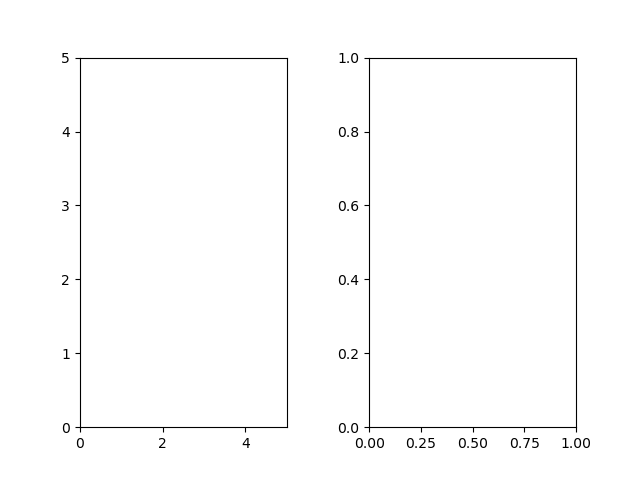

In [4]:
fig = plt.figure()

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0.4)
ax1.set_xlim([0, 5])
ax1.set_ylim([0, 5])
PtContX=[]
PtContY=[]

cid = fig.canvas.mpl_connect('button_press_event', onclick)
""" Attention on ne fait que l'acquisition des points dans cette cellule
    les courbes s'obtiennent en ex√©cutant la cellule suivante.
    Ce n'est pas tr√®s intuitif, d'o√π la remarque ci-dessous (modification de
    la fonction onclick).
    Laiss√© √† l'appr√©ciation de l'√©tudiant.
"""

In [5]:
""" Remarque : on peut √©galement modifier la fonction onclick et ajouter les commandes
ci-dessous lors du clic droit (apr√®s la d√©connexion √† la figure : plt.disconnect).
On obtiendra alors le trac√© des courbes juste apr√®s le dernier clic. 
"""
# Juste apr√®s :
N = len(PtContX)
points = np.array([PtContX,PtContY]).T
c = Bezier(points)
if N > 1:  # il faut au moins 2 points
# Calcul de la courbe de B√©zier
    
    
    # Trac√© sur ax1
    ax1.plot(PtContX, PtContY, 'ro--', label="Polygone de contr√¥le")
    ax1.plot(c[0,:], c[1,:], 'b-', label="Courbe de B√©zier")
    ax1.legend()
    
    # Trac√© sur ax2 des B_i^n
    ax2.set_title("Polyn√¥mes de Bernstein")
    t = np.linspace(0,1,200)
    n = N-1
    somme = np.zeros_like(t)
    #Pour chaque indice i, calcule le polyn√¥me de Bernsteinet le trace.
    for i in range(n+1):
        Bi = Bernstein(n, i, t)
        ax2.plot(t, Bi, label=f"B_{i}^{n}")
        somme += Bi
    ax2.plot(t, somme, 'k--', linewidth=2, label="Somme")
    ax2.legend()



### Sous-courbes de B√©zier

On souhaite d√©couper une courbe de B√©zier, ${\cal B}^{n}$, de degr√© $n$ en deux morceaux ${\cal C}^{n}$ et ${\cal D}^{n}$. Chaque morceau sera une courbe de B√©zier de m√™me degr√© $n$.  
La courbe de B√©zier ${\cal B}^{n}$ est d√©termin√©e par les $n+1$ points de contr√¥le $P_0, P_1,\ldots,P_n$.  
Soit $B(t_0)$ le point de la courbe de B√©zier  ${\cal B}^{n}$ o√π l'on souhaite ``d√©couper''. On va d√©montrer **num√©riquement** que les $n+1$ points de contr√¥le de chaque morceau sont donn√©s par l'algorithme de De Casteljau. 

<div>
<img src="Principe_algorithme_de_casteljau.png-1.png" width="420"/>
</div>

Ecrire une fonction  **DeCasteljau(P,t0)**, prenant en param√®tres d'entr√©es $n+1$ points et un scalaire $t_0 \in [0,1]$ et qui renvoie le point $P_{t_0}$  de la courbe de B√©zier de param√®tre $t_0$

In [6]:
def DeCasteljau(P,t0):
    """P est un array (2,n+1) form√© des coordonn√©es des
        points de contr√¥le. t0 est le param√®tre.
        La fonction renvoie le point P0 de la courbe de B√©zier correspondant
        au param√®tre t0 sous la forme d'un array √† deux lignes et une colonne.
    """
    # Votre code ici
    n = len(P[0]) -1
    Q = np.copy(P)
    for i in range(n, 0, -1):
        for j in range(i):
            #L'algorithme calcule successivement des interpolations lin√©aires entre les points voisins, en r√©duisant leur nombre √† chaque √©tape.
            Q[0,j] = (1-t0)*Q[0,j] + t0*Q[0,j+1]
            Q[1,j] = (1-t0)*Q[1,j] + t0*Q[1,j+1]
    P0 = np.array([[Q[0][0]], [Q[1][0]]])
    return P0

In [7]:
"""V√©rifiez vos r√©sultats sur les tests suivants"""
Px=[1.1129942247944489, 0.8468651925363844, 3.2662200312460614, 4.209768418342835]
Py=[0.3947177903476734, 1.382271902901786, 1.8828130284429112, 0.6517524223823054]

assert all(np.round(DeCasteljau(np.array([Px,Py]),0.3),4) == np.array([[1.4862],[1.1184]]))


Modifier la fonction pr√©c√©dente pour qu'elle renvoie le point $P_{t_0}$  de la courbe de B√©zier de param√®tre $t_0$ ainsi que deux tableaux numpy, $P_1, P_2$ de $n+1$ points constitu√©s des points interm√©diaires qui ont servi au calcul du  point de param√®tre $t_0$ par l'algorithme de De Casteljau.  
Le premier tableau, $P_1$, est form√© du premier point de contr√¥le et des **premiers** points de chaque √©tape de l'algorithme de De Casteljau. Le deuxi√®me, $P_2$ est form√© du dernier point de contr√¥le et des **derniers** points de chaque √©tape de l'algorithme de De Casteljau mais ordonn√© dans le sens inverse (voir exemple ci-dessous).  
Reprenons l'exemple de la figure ci-dessus, on obtiendra ainsi
$$ P_1=\{P_0^0, P_0^1, P_0^2,P_0^3  \} \; \text{et} \; P_2=\{P_0^3,P_1^2,P_2^1,P_3^0 \}  $$

In [8]:
def DeCasteljau2(P, t0):
    """
    Calcule un point sur la courbe de B√©zier et les sous-polygones de contr√¥le.
    
    Args:
        P : numpy array de forme (2, n+1) contenant les coordonn√©es des points de contr√¥le
        t0 : param√®tre entre 0 et 1
    
    Returns:
        P0 : point sur la courbe au param√®tre t0
        P1 : premier sous-polygone de contr√¥le
        P2 : second sous-polygone de contr√¥le
    """
    if not (0 < t0 < 1):
        raise ValueError("t0 must be in the interval ]0, 1[")
    
    n = P.shape[1] - 1  # degr√© de la courbe
    Q = np.copy(P)
    P1 = np.zeros((2, n + 1))
    P2 = np.zeros((2, n + 1))
    
    # Initialisation des premiers points
    P1[:, 0] = P[:, 0]
    P2[:, n] = P[:, n]
    
    # Application de l'algorithme de De Casteljau
    for r in range(1, n + 1):
        for i in range(n - r + 1):
            Q[:, i] = (1 - t0) * Q[:, i] + t0 * Q[:, i + 1]
            
            # Stockage des points pour les sous-polygones
            if i == 0:
                P1[:, r] = Q[:, 0]
            if i == n - r:
                P2[:, n - r] = Q[:, i]
    
    # Point sur la courbe
    P0 = Q[:, 0].reshape(2, 1)
    
    return P0, P1, P2

In [9]:
"""V√©rifiez vos r√©sultats sur les tests suivants"""
np.all(np.round(DeCasteljau2(np.array([Px,Py]),0.3)[0],4) == np.array([[1.4862],[1.1184]]))
np.all(np.round(DeCasteljau2(np.array([Px,Py]),0.3)[1],4) == np.array([[1.1130, 1.0332, 1.1950, 1.4862],[0.3947,0.691 , 0.9434, 1.1184]]))

np.True_

Dans cette derni√®re partie, on souhaite faire l'acquisition des points de contr√¥le √† la souris, les repr√©senter sur la figure (ainsi que le polyg√¥ne de contr√¥le correspondant) puis tracer sur la m√™me figure la courbes de B√©zier associ√©e √† ces points ainsi  que les deux sous courbes de B√©zier associ√©es (l'utisateur choisira le param√®tre de coupure t0).  
Vous devriez, au final, avoir une figure semblable √† celle ci-dessous.

<div>
<img src="SousCourbes.png" width="520"/>
</div>

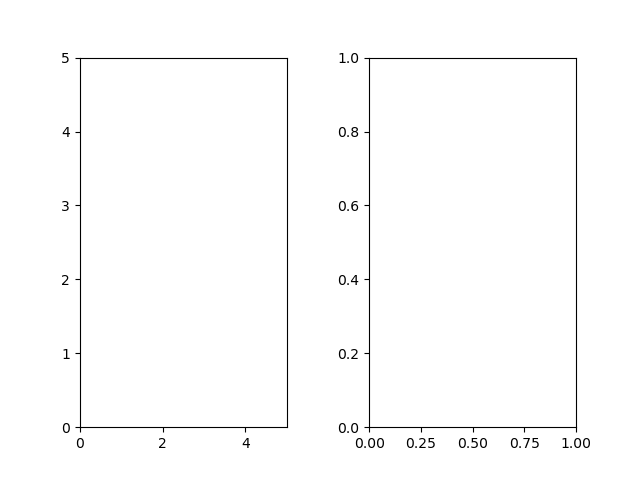

In [10]:
# Acquisition des points de contr√¥le
# Votre code ici
PtContX=[]
PtContY=[]
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0.4)
ax1.set_xlim([0, 5])
ax1.set_ylim([0, 5])
cid = fig.canvas.mpl_connect('button_press_event', onclick)

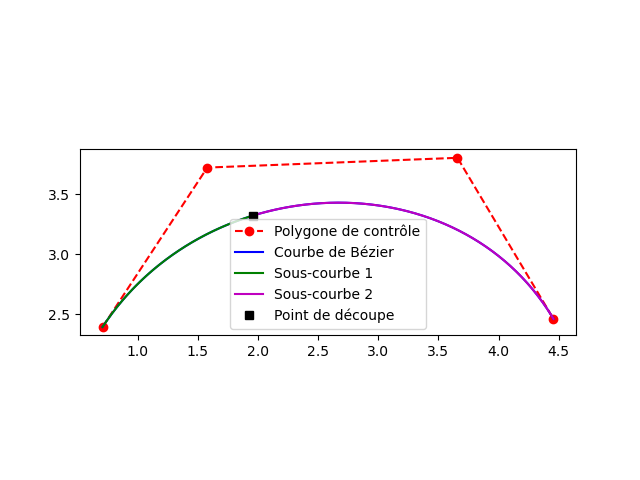

In [11]:
def SousCourbes(PtContX,PtContY,t0):
    """
    Les coordonn√©es des points de contr√¥le sont donn√©s par les listes PtContX et PtContY.
    t0 est le param√®tre du point de d√©coupe.
    On trace, sur la m√™me figure :
     - le polygone de contr√¥le
     - la courbe de B√©zier originale
     - les deux sous-courbes (m√™me degr√©) correspondant √† la d√©coupe
    """
    # VOTRE CODE ICI
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal', 'box')

    # Construction de l'array numpy P
    P = np.array([PtContX, PtContY])
    n = P.shape[1] - 1

    # Trac√© du polygone de contr√¥le
    ax.plot(PtContX, PtContY, 'ro--', label="Polygone de contr√¥le")

    # Trac√© de la courbe de B√©zier initiale
    C = Bezier(P)
    ax.plot(C[0,:], C[1,:], 'b-', label="Courbe de B√©zier")

    # Appel √† DeCasteljau2 pour r√©cup√©rer P0, P1, P2
    P0, P1, P2 = DeCasteljau2(P, t0)

    # P1 et P2 sont chacun (2, n+1) points de contr√¥le pour chacune des deux sous-courbes
    # On calcule la sous-courbe 1 (de 0 √† t0)
    C1 = Bezier(P1)
    # On calcule la sous-courbe 2 (de t0 √† 1)
    C2 = Bezier(P2)

    ax.plot(C1[0,:], C1[1,:], 'g-', label="Sous-courbe 1")
    ax.plot(C2[0,:], C2[1,:], 'm-', label="Sous-courbe 2")

    # On peut ajouter le point d'intersection
    ax.plot(P0[0,0], P0[1,0], 'ks', label="Point de d√©coupe")

    ax.legend()
    plt.show()

    
SousCourbes(PtContX,PtContY,0.35)   

### B√©zier rationnelles
  

Dans cette partie on s'interesse aux courbes de B√©zier rationnelles, $ {\cal B}^{n}$.  
L'id√©e est d'ajouter des poids, $\omega_i$, aux points de contr√¥le $P_i$.  

Pour $n+1$ points de contr√¥le $(\mathbf{P}_0, \dots, \mathbf{P}_n)$, et $n+1$ poids $\omega_i, i\in\{0,\ldots,n\}$ **non tous nuls**, on d√©finit la courbe de B√©zier rationnelle  
$$B_r(t)=\displaystyle \frac{\displaystyle\sum_{i=0}^n B_i^n(t) \omega_i \mathbf{P}_i }{\displaystyle\sum_{i=0}^n B_i^n(t) \omega_i } , \quad t \in[0,1] $$  
o√π les $B_i^n$ sont les polyn√¥mes de Bernstein et la suite des points $\mathbf{P}_0, \dots, \mathbf{P}_n$ forme le polygone de contr√¥le.

Que se passe t'il si tous les poids sont √©gaux, quelle courbe obtient-on ?  
Justifiez bri√®vement (mais clairement) votre r√©ponse dans la cellule ci-dessus.

YOUR ANSWER HERE :

Si tous les poids ùúîùëñ sont √©gaux, disons ùúîùëñ=ùúî pour tout ùëñ, la formule de la courbe de B√©zier rationnelle devient 

$$B_r(t)=\displaystyle \frac{\displaystyle\sum_{i=0}^n B_i^n(t) \omega \mathbf{P}_i }{\displaystyle\sum_{i=0}^n B_i^n(t) \omega }$$  

En simplifiant, puisque ùúî est une constante commune au num√©rateur et au d√©nominateur, on peut la factoriser et l'annuler :

$$B_r(t)=\displaystyle \frac{\omega \displaystyle\sum_{i=0}^n B_i^n(t)  \mathbf{P}_i }{\omega\displaystyle\sum_{i=0}^n B_i^n(t)}  = \displaystyle \frac{ \displaystyle\sum_{i=0}^n B_i^n(t)  \mathbf{P}_i }{\displaystyle\sum_{i=0}^n B_i^n(t)}$$

Nous savons que la somme des polyn√¥mes de Bernstein est √©gale √† 1 :

$${\displaystyle\sum_{i=0}^n B_i^n(t)} = 1 $$

Par cons√©quent, l'√©quation se simplifie en :

$$B_r(t)= {\displaystyle\sum_{i=0}^n B_i^n(t)}\mathbf{P}_i$$


Cette √©quation correspond exactement √† la d√©finition d'une courbe de B√©zier classique de degr√© ùëõ. Donc, si tous les poids sont √©gaux, la courbe de B√©zier rationnelle devient une courbe de B√©zier classique.




Ecrire une fonction qui prend en param√®tre d'entr√©e les points de contr√¥le (sous forme d'un **tableau numpy** √† 2 lignes et n+1 colonnes, une **liste** de n+1 poids ainsi qu'un param√®tre $t \in [0,1]$ et qui renvoie le point de la courbe de B√©zier rationnelle correspondant √† $t$.   

In [12]:
def BezierRat(Pc, L, t):
    """
    Courbe de B√©zier rationnelle associ√©e aux points de contr√¥le Pc
    pass√©s en param√®tre d'entr√©e, une liste L de poids et un
    param√®tre t.
    
    Args:
        Pc : Tableau numpy de points de contr√¥le (2 lignes x n colonnes)
        L : Liste des poids associ√©s aux points
        t : Param√®tre entre 0 et 1
    
    Returns:
        Point Pt de la courbe au param√®tre t sous forme de tableau numpy 2x1
    """
    # V√©rifie si tous les poids sont nuls
    if all(w == 0 for w in L):
        raise ValueError("Tous les poids sont nuls")
    
    n = len(L) - 1  # Degr√© de la courbe
    
    # Initialisation des num√©rateurs et d√©nominateur
    num = np.zeros((2,1))
    denom = 0
    
    # Pour chaque point de contr√¥le
    for i in range(n + 1):
        # Calcul du terme de Bernstein
        bernstein = Bernstein(n, i, t)
        
        # Mise √† jour des num√©rateurs et d√©nominateur
        num += L[i] * bernstein * Pc[:,i:i+1]
        denom += L[i] * bernstein
    
    # Calcul du point final
    return num / denom


In [13]:
"""V√©rifiez vos r√©sultats sur les tests suivants"""
np.all(np.round(BezierRat(np.array([Px,Py]),[4,4,4,4],0.5),4)==np.array([[2.2078],[1.3552]]))


np.True_

Modifier la fonction pr√©c√©dente pour pouvoir passer un vecteur de param√®tres (t = np.linspace(0,1,100) par exemple). 

In [14]:
def BezierRatVect(Pc,L,t):
   """Courbe de B√©zier rationnelle associ√©e aux points de contr√¥le Pc
      pass√©s en param√®tre d'entr√©e, une liste L de poids et un vecteur
      de param√®tre t.
      La fonction renvoie les points Pts de la courbe correpondant aux param√®tres t
      On g√©rera une exception si tous les poids sont nuls (raise ValueError())
   """
   # Votre code ici
   if all(w == 0 for w in L):
      raise ValueError("Tous les poids sont nuls")
   n = len(L) - 1
   num = np.zeros((2, len(t)))
   denom = np.zeros(len(t))
   for i in range(n + 1):
      coef = 1
      for k in range(i):
         coef *= (n - k)
         coef //= (k + 1)
      bernstein = Bernstein(n, i, t)
      num += L[i] * bernstein * Pc[:,i:i+1]
      denom += L[i] * bernstein
   return num/denom

In [15]:
"""V√©rifiez vos r√©sultats sur les tests suivants"""
np.all(np.round(BezierRatVect(np.array([Px,Py]),[4,4,4,4],np.linspace(0,1,6)),4)==np.array([[1.113 , 1.2423, 1.8163, 2.6354, 3.4998, 4.2098],
[0.3947, 0.9189, 1.2664, 1.3775, 1.1926, 0.6518]]))


np.True_

Ecrire une fonction qui prend comme param√®tre d'entr√©e les points de contr√¥le (sous forme d'un tableau numpy) ainsi qu'une liste, L,  de poids et qui trace sur une m√™me figure les points de contr√¥le, le polygone de contr√¥le et la courbe de B√©zier rationnelle (cubique) associ√©e √† ces points et ces poids. 

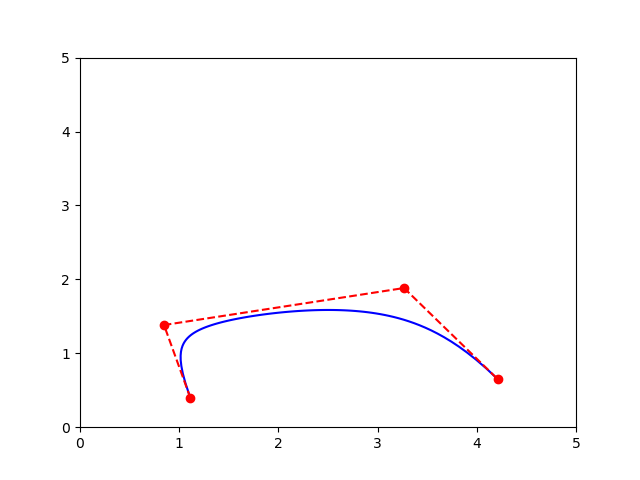

In [16]:
def TraceBezRat(Pc,L):
    """ Pc est un array numpy de dimension(2,n+1) (abscisses et ordonn√©es des points de contr√¥le) et L la liste des poids.
        La fonction ne renvoie rien.
        """
    t=np.linspace(0,1,100)
    # Votre code ici
    c = BezierRatVect(Pc,L,t)
    plt.clf()
    plt.plot(c[0],c[1],'b')
    plt.plot(Pc[0],Pc[1],'ro--')
    plt.xlim([0,5])
    plt.ylim([0,5])
    plt.show()

# En appelant TraceBezRat(np.array([Px,Py]),[0.5,4,3,0.7]) Vous devriez obtenir la figure ci-dessous
TraceBezRat(np.array([Px,Py]),[0.5,4,3,0.7])


En appelant TraceBezRat(np.array([Px,Py]),[0.5,4,3,0.7]) Vous devriez obtenir la figure ci-dessous

<div>
<img src="BezierRat.png" width="520"/>
</div>

En d√©duire, en faisant quelques tests, l'effet des poids sur la courbe. Expliquer bi√®vement dans la cellule ci-dessous.

Si tous les poids sont identiques ‚Üí La courbe rationnelle se transforme en une courbe de B√©zier standard. Les poids n'ont donc aucun impact sp√©cifique.
Si un poids est sup√©rieur ‚Üí Le point de contr√¥le associ√© attire la courbe vers lui, indiquant que la courbe tend √† se rapprocher davantage de ce point.
Si un poids est r√©duit ‚Üí La courbe se d√©tache du point de contr√¥le associ√©.

Il est donc possible d'ajuster la forme de la courbe en modifiant les poids, sans avoir √† modifier les points de contr√¥le eux-m√™mes. Cela autorise la cr√©ation de formes plus sophistiqu√©es, telles que des arcs ou des ellipses, ce qui n'est pas r√©alisable avec une courbe de B√©zier standard.Votre reponse ici